Data Set Informatio

Clustering abalone from physical measurements. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
* Gender / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.5f}'.format

In [73]:
df_aba = pd.read_csv('abalone.data',names=['Gender','Length','Diameter','Height','Weight','MeatWeight','GutWeight','ShellWeight','Rings'])
df_aba.head()

Gender  Length  Diameter  Height  Weight  MeatWeight  GutWeight  \
0      M 0.45500   0.36500 0.09500 0.51400     0.22450    0.10100   
1      M 0.35000   0.26500 0.09000 0.22550     0.09950    0.04850   
2      F 0.53000   0.42000 0.13500 0.67700     0.25650    0.14150   
3      M 0.44000   0.36500 0.12500 0.51600     0.21550    0.11400   
4      I 0.33000   0.25500 0.08000 0.20500     0.08950    0.03950   

   ShellWeight  Rings  
0      0.15000     15  
1      0.07000      7  
2      0.21000      9  
3      0.15500     10  
4      0.05500      7

In [140]:
df_aba.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Weight', 'MeatWeight',
       'GutWeight', 'ShellWeight', 'Rings'],
      dtype='object')

In [74]:
df_aba.shape

(4177, 9)

In [75]:
df_aba['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [76]:
y =df_aba['Gender']

In [77]:
df = df_aba.drop(['Gender'],axis =1)
df.shape

(4177, 8)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Length       4177 non-null   float64
 1   Diameter     4177 non-null   float64
 2   Height       4177 non-null   float64
 3   Weight       4177 non-null   float64
 4   MeatWeight   4177 non-null   float64
 5   GutWeight    4177 non-null   float64
 6   ShellWeight  4177 non-null   float64
 7   Rings        4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [79]:
df.isnull().sum()

Length         0
Diameter       0
Height         0
Weight         0
MeatWeight     0
GutWeight      0
ShellWeight    0
Rings          0
dtype: int64

In [80]:
# No null values

In [81]:
# Check for outliers

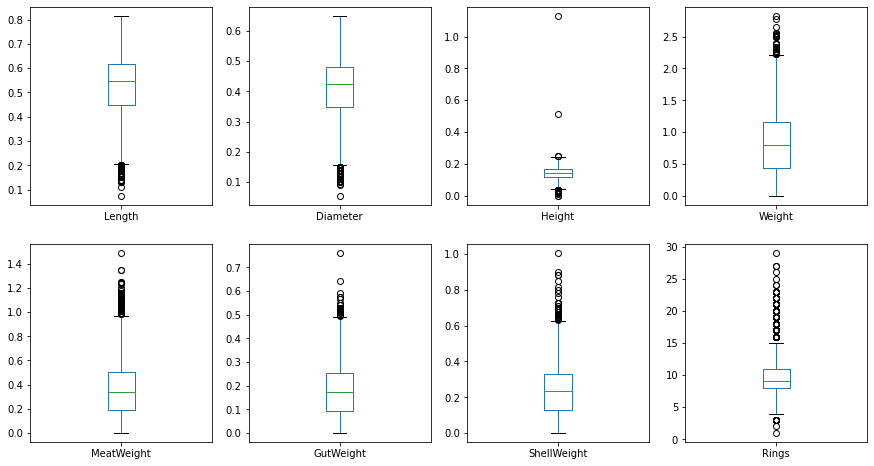

In [82]:
df.plot(kind = 'box',subplots = True, layout = [2,4],sharex = False, figsize = [15,8])
plt.show()

In [83]:
# calculate the first quartile
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)

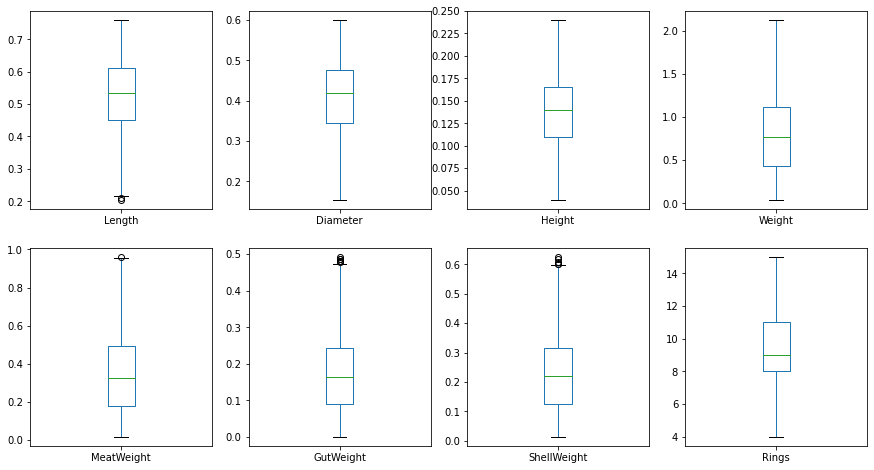

In [84]:
df.plot(kind = 'box',subplots = True, layout = [2,4],sharex = False, figsize = [15,8])
plt.show()

In [85]:
# Effect of outliers has been reduced.

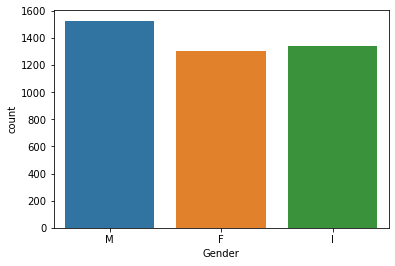

In [86]:
sns.countplot(df_aba['Gender'])
plt.show()

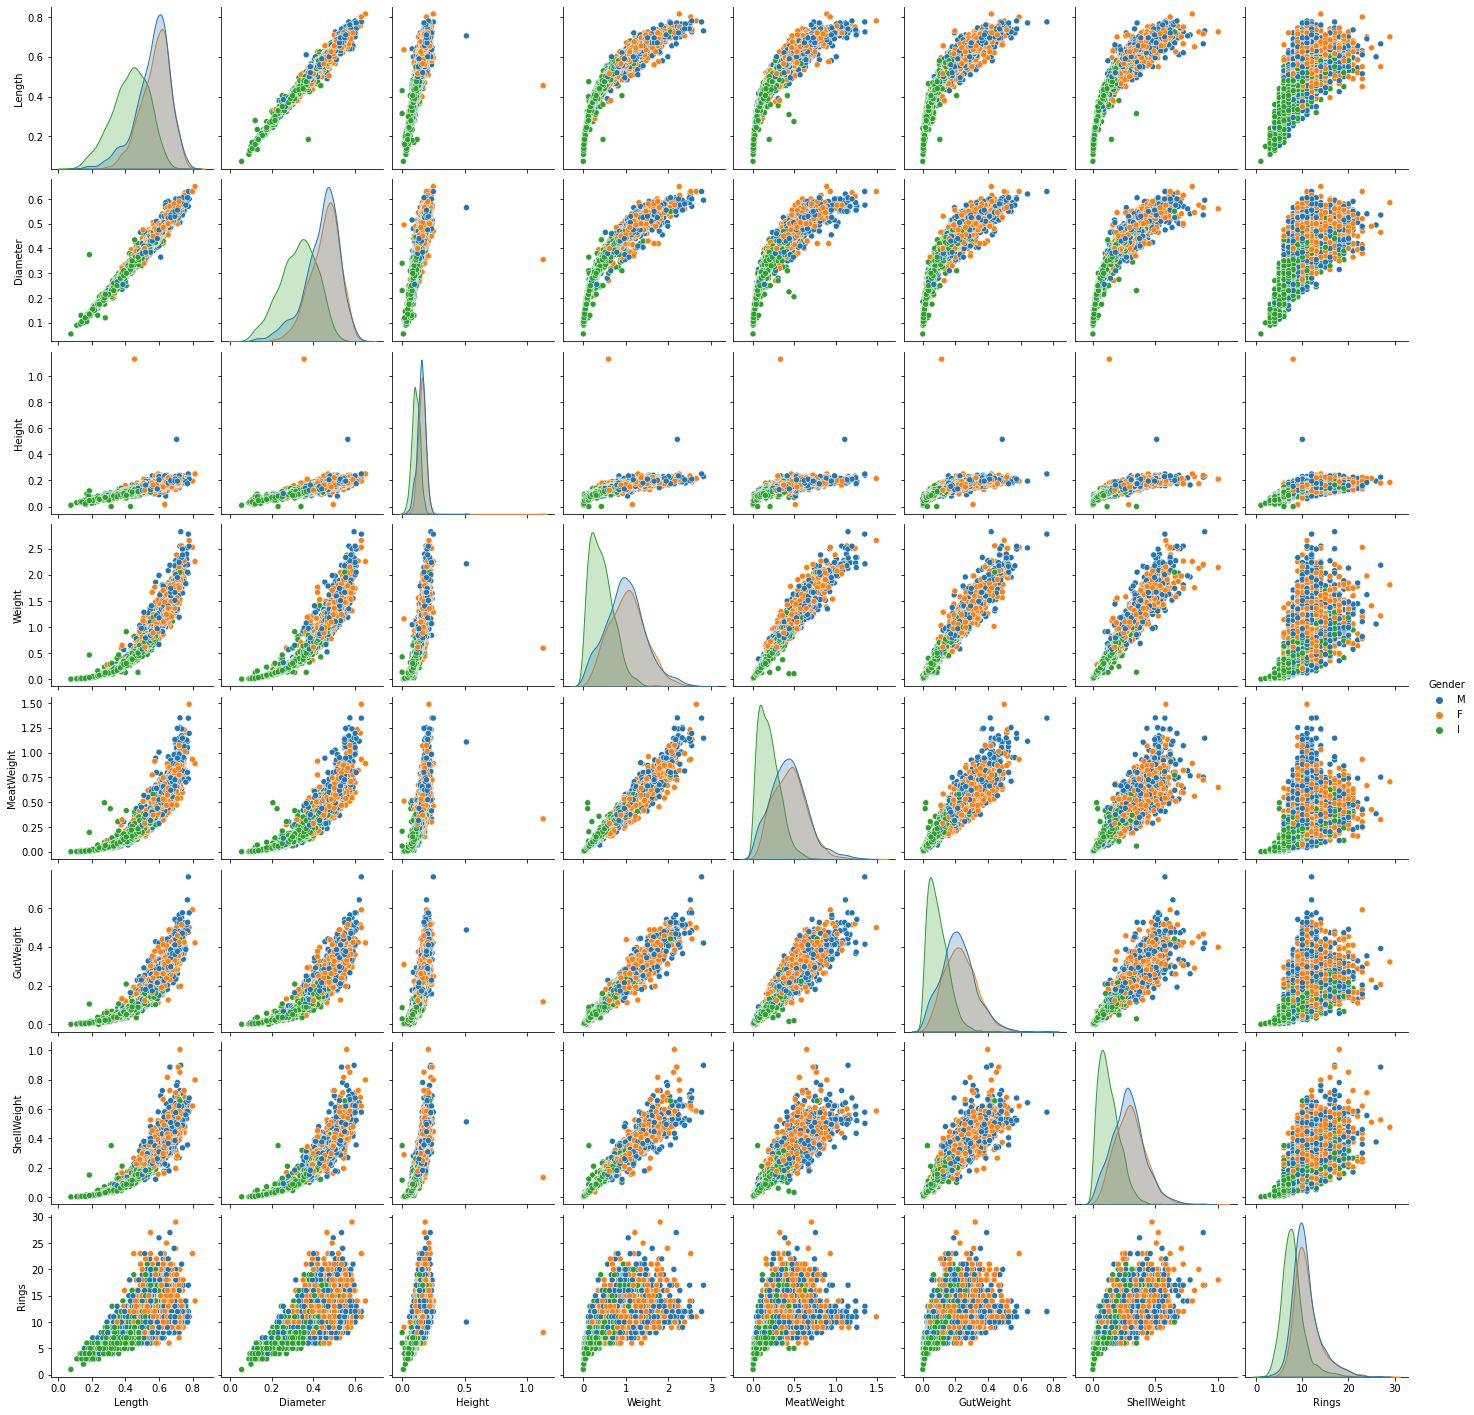

In [87]:
sns.pairplot(data = df_aba, hue ='Gender')
plt.show()

### Scaling the features using StandardScaler from Scikitlearn

Scaling is very important before clustering. It is used when we need to represent pysical reality in a mathematical space.
There are different scaling techniques such as Min-Max scaling, z-score, Standard scaling etc.
Here I am using StandarScaler technique from scikitlearn.

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
num_sc = sc.fit_transform(df)
df_scaled = pd.DataFrame(num_sc,columns = df.columns)
df_scaled.head()

Length  Diameter   Height   Weight  MeatWeight  GutWeight  ShellWeight  \
0 -0.59228  -0.43341 -1.19900 -0.62550    -0.60442   -0.71929     -0.61950   
1 -1.53397  -1.51734 -1.34065 -1.27434    -1.21873   -1.23750     -1.27092   
2  0.08035   0.16275 -0.06586 -0.25891    -0.44715   -0.31953     -0.13093   
3 -0.72681  -0.43341 -0.34914 -0.62100    -0.64865   -0.59097     -0.57878   
4 -1.71334  -1.62574 -1.62393 -1.32044    -1.26787   -1.32634     -1.39307   

     Rings  
0  2.39017  
1 -1.04310  
2 -0.18479  
3  0.24437  
4 -1.04310

### Perform KMeans clustering with (K=3) 

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=10)

In [92]:
cluster_range = range(1,15)
wcss = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
cluster_df = pd.DataFrame({'Number_of_clusters':cluster_range, 'Inertia':wcss})
cluster_df

Number_of_clusters     Inertia
0                    1 30248.00000
1                    2 12063.24479
2                    3  7759.02860
3                    4  6087.16236
4                    5  5197.72941
5                    6  4495.78019
6                    7  4061.55181
7                    8  3650.18058
8                    9  3412.73946
9                   10  3211.07445
10                  11  3029.27676
11                  12  2899.87463
12                  13  2784.88145
13                  14  2678.50285

### Plotting Elbow plot  to find the optimum value of K 

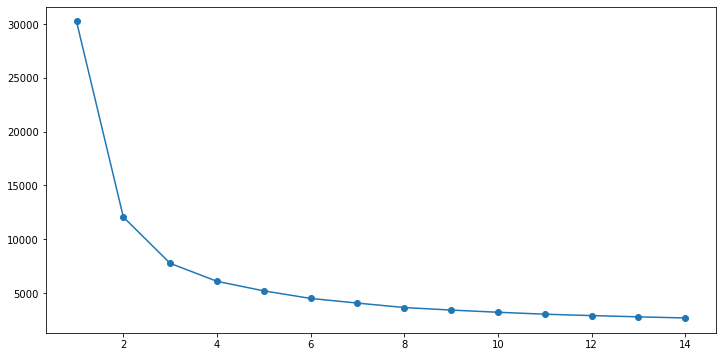

In [93]:
plt.figure(figsize=(12,6))
plt.plot( cluster_df.Number_of_clusters, cluster_df.Inertia, marker = "o" )

#### From the above visualization, we can see that the optimal number of clusters should be around 3 as the sum of squared errors(Inertia) tapered off. This point is known as the Elbow or Knee which tells us the optimal K value.

### Training the Algorithm with the optimun number of clusters identified from the elbow plot. 

Which is k =3 and initialization as 'k-means++'. The 'k-means++' schema implemented in scikit learn initializes centroid to be distant to one another which leads to better result. 

In [94]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=10)

kmeans.fit(df_scaled)

y_pred_kmeans = kmeans.predict(df_scaled)

In [95]:
# centroids for the clusters.

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids,columns = df_scaled.columns)
centroids_df

Length  Diameter   Height   Weight  MeatWeight  GutWeight  ShellWeight  \
0  0.10441   0.10391  0.06489 -0.09989    -0.11002   -0.10383     -0.06465   
1 -1.26111  -1.26217 -1.19448 -1.14759    -1.09839   -1.11789     -1.15243   
2  1.04251   1.04413  1.03103  1.19859     1.16568    1.17594      1.15791   

     Rings  
0  0.19315  
1 -0.92496  
2  0.61515

In [96]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_, columns = ['Label'])
df_labels['Label'] = df_labels['Label'].astype('object')

In [97]:
# Joining the label dataframe with the original data frame to create the labelled dataframe

df_k = df.join(df_labels)

### Comparing Original Classes and K-Means Algorithm Classes:

In [98]:
print('Original Data Classes:')
print(df_aba['Gender'].value_counts())
print()
print('Percentage :')
print(((df_aba['Gender'].value_counts())*100)/len(df_aba['Gender']))

print('-' * 30)

print('K-Means Classes:')
print(df_k['Label'].value_counts())
print()
print('Percentage :')
print(((df_k['Label'].value_counts())*100)/len(df_k['Label']))

Original Data Classes:
M    1528
I    1342
F    1307
Name: Gender, dtype: int64

Percentage :
M   36.58128
I   32.12832
F   31.29040
Name: Gender, dtype: float64
------------------------------
K-Means Classes:
0    1504
2    1180
1    1097
Name: Label, dtype: int64

Percentage :
0   39.77784
2   31.20867
1   29.01349
Name: Label, dtype: float64


### Representing the original and predicted clusters visually

For visualization I will use only two features (Diameter and Weight) for the original and predicted datasets. Different classes will have seperate color and styles.

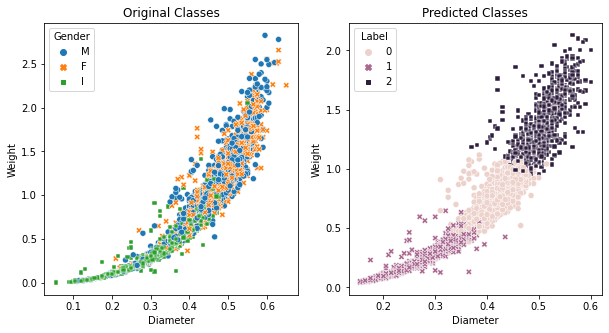

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='Diameter', y='Weight', hue= 'Gender', style='Gender', data = df_aba, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='Diameter', y='Weight', hue='Label', style='Label', data=df_k, ax=ax2)
plt.show()

### 3D plot of KMeans Clustering

In [100]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

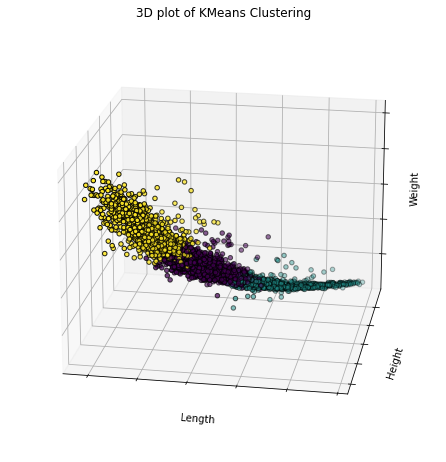

In [101]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

# HIERARCHICAL CLUSTERING ALGORITHM 

### Algorithm for bottom-up (Agglomerative clustering)

1. It starts by calculating the distance between every pair of observation points and store it in a distance matrix.
2. It then puts every point in its own cluster.
3. Then it starts merging the closest pairs of points based on the distances from the distance matrix and as a result the amount of clusters goes down by 1.
4. Then it recomputes the distance between the new cluster and the old ones and stores them in a new distance matrix.
5. Lastly it repeats steps 2 and 3 until all the clusters are merged into one single cluster.

### Inter-cluster linkage methods for merging clusters

- There are several ways to measure the distance between clusters in order to decide the rules for clustering,
- and they are often called **Linkage Methods**.
- Some of the common linkage methods are:
  - `Complete-linkage`: calculates the maximum distance between clusters before merging.
  - `Single-linkage`: calculates the minimum distance between the clusters before merging. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.
  - `Average-linkage`: calculates the average distance between clusters before merging.
  - `Centroid-linkage`: finds centroid of cluster 1 and centroid of cluster 2, and then calculates the distance between the two before merging.
- The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters. 

- After selecting a distance metric, it is necessary to determine from where distance is computed.
- For example, it can be computed between the two most similar parts of a cluster `(single-linkage)`,
- the two least similar bits of a cluster `(complete-linkage)`,
- the center of the clusters `(mean or average-linkage)`, 
- or some other criterion. Many linkage criteria have been developed.

- As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application.
- A key theoretical issue is what causes variation.
- For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

- Where there are no clear theoretical justifications for choice of linkage criteria, `Ward’s method` is the sensible default.
- This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. 
- This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

**The main output of Hierarchical Clustering is a `dendrogram`, which shows the hierarchical relationship between the clusters**

### Dendrograms
- A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts
- In hierarchical clustering, you categorize the objects into a hierarchy similar to a tree-like diagram which is called a dendrogram. 
-  once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points

### Cophenetic coefficient and its importance in quality of the dendogram

- Given the large number of techniques, it is often difficult to decide which is best.
- One criterion that has become popular is to use the result that has largest `cophenetic correlation coefficient`.
- This is the correlation between the original distances and those that result from the cluster configuration. 
- Values above 0.75 are felt to be good. 
- The Group Average method appears to produce high values of this statistic. This may be one reason that it is so popular.
- This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. 
- The closer the value is to 1, the better the clustering preserves the original distances,

### Use Cophenet index to find best linkage method

* Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
* closer it is to 1, the better is the clustering,it represents the tightness of the clusters 

In [102]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [103]:
z1 = linkage(y = df_scaled, method ='single')
c1, cophen_dist = cophenet(z1,pdist(df_scaled))
print('Single', c1)

z2 = linkage(y = df_scaled, method ='complete')
c2, cophen_dist = cophenet(z2,pdist(df_scaled))
print('complete', c2)

z3 = linkage(y = df_scaled,method='average')
c3 , cophen_dist =cophenet(z3, pdist(df_scaled))
print('average: ',c3)

z4 = linkage(y = df_scaled,method='ward')
c4 , cophen_dist =cophenet(z4, pdist(df_scaled))
print('ward: ',c4)

Single 0.26131917589502446
complete 0.6394211864336767
average:  0.6480379926715825
ward:  0.6299114450293851


**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

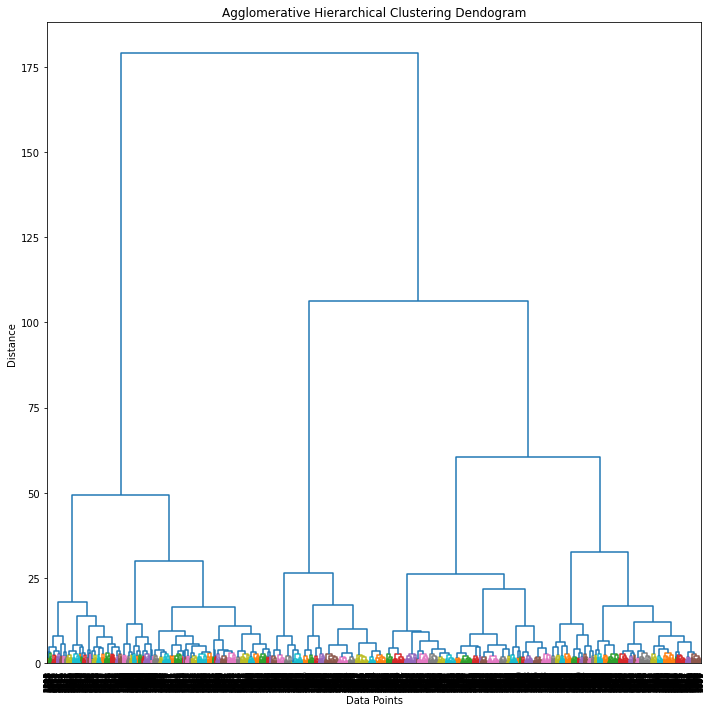

In [104]:
plt.figure(figsize=(10, 10))

plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

dendrogram(z4, leaf_rotation=90., color_threshold=3, leaf_font_size=8. )

plt.tight_layout()

**From the dendrogram we can read there are 3 classes in our data set.**

In [105]:
#build the model using ward method

from sklearn.cluster import AgglomerativeClustering

In [106]:
hie_clus = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage = 'ward')

hie_clus.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [107]:
df['Labels'] = hie_clus.labels_
df.head()

Length  Diameter  Height  Weight  MeatWeight  GutWeight  ShellWeight  \
0 0.45500   0.36500 0.09500 0.51400     0.22450    0.10100      0.15000   
1 0.35000   0.26500 0.09000 0.22550     0.09950    0.04850      0.07000   
2 0.53000   0.42000 0.13500 0.67700     0.25650    0.14150      0.21000   
3 0.44000   0.36500 0.12500 0.51600     0.21550    0.11400      0.15500   
4 0.33000   0.25500 0.08000 0.20500     0.08950    0.03950      0.05500   

   Rings  Labels  
0     15       0  
1      7       2  
2      9       0  
3     10       0  
4      7       2

In [108]:
df_h =df.copy()

In [109]:
print('Original Data Classes:')
print(df_aba['Gender'].value_counts())
print()
print('Percentage :')
print(((df_aba['Gender'].value_counts())*100)/len(df_aba['Gender']))

print('-' * 30)

print('K-Means Classes:')
print(df_k['Label'].value_counts())
print()
print('Percentage :')
print(((df_k['Label'].value_counts())*100)/len(df_k['Label']))

print('-' * 30)

print('Hierarchical Classes:')
print(df_h['Labels'].value_counts())
print()
print('Percentage :')
print(((df_h['Labels'].value_counts())*100)/len(df_h['Labels']))

Original Data Classes:
M    1528
I    1342
F    1307
Name: Gender, dtype: int64

Percentage :
M   36.58128
I   32.12832
F   31.29040
Name: Gender, dtype: float64
------------------------------
K-Means Classes:
0    1504
2    1180
1    1097
Name: Label, dtype: int64

Percentage :
0   39.77784
2   31.20867
1   29.01349
Name: Label, dtype: float64
------------------------------
Hierarchical Classes:
0    1820
1    1297
2     664
Name: Labels, dtype: int64

Percentage :
0   48.13541
1   34.30309
2   17.56149
Name: Labels, dtype: float64


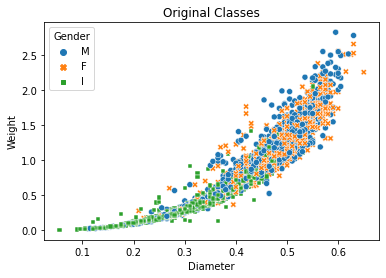

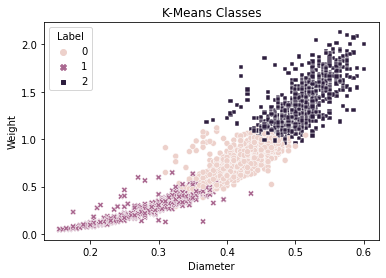

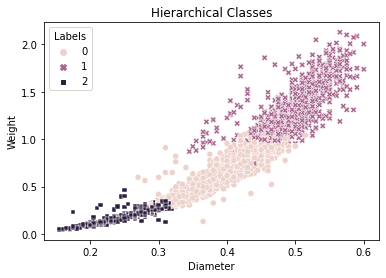

In [110]:
plt.title('Original Classes')
sns.scatterplot(x='Diameter', y='Weight', hue='Gender', style='Gender', data=df_aba)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='Diameter', y='Weight', hue='Label', style='Label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='Diameter', y='Weight', hue='Labels', style='Labels', data=df_h)
plt.show()

## Build a Classification model :-

### K Means

In [111]:
df_k.head()

Length  Diameter  Height  Weight  MeatWeight  GutWeight  ShellWeight  \
0 0.45500   0.36500 0.09500 0.51400     0.22450    0.10100      0.15000   
1 0.35000   0.26500 0.09000 0.22550     0.09950    0.04850      0.07000   
2 0.53000   0.42000 0.13500 0.67700     0.25650    0.14150      0.21000   
3 0.44000   0.36500 0.12500 0.51600     0.21550    0.11400      0.15500   
4 0.33000   0.25500 0.08000 0.20500     0.08950    0.03950      0.05500   

   Rings Label  
0     15     0  
1      7     1  
2      9     0  
3     10     0  
4      7     1

In [112]:
df_k.dtypes

Length         float64
Diameter       float64
Height         float64
Weight         float64
MeatWeight     float64
GutWeight      float64
ShellWeight    float64
Rings            int64
Label           object
dtype: object

In [113]:
X= df_k.drop('Label',axis=1)
y= df_k['Label'].astype('int')
X.shape, y.shape

((3781, 8), (3781,))

In [114]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X = pd.DataFrame(X_sc,columns = X.columns)
X.head()
X.shape

(3781, 8)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Decision Tree Classifier

In [117]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [118]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [119]:
y_predict_train= dt.predict(X_train)
acc=accuracy_score(y_train, y_predict_train)
print('Acuuracy train: ',round(acc,2))

Acuuracy train:  0.95


In [120]:
y_predict_test= dt.predict(X_test)
acc=accuracy_score(y_test, y_predict_test)
print('Acuuracy test: ',round(acc,2))

Acuuracy test:  0.94


### Random Forest

In [121]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [122]:
y_predict_train= RFclassifier.predict(X_train)
acc=accuracy_score(y_train, y_predict_train)
print('Acuuracy train: ',round(acc,2))

Acuuracy train:  0.98


In [123]:
y_predict_test= RFclassifier.predict(X_test)
acc=accuracy_score(y_test, y_predict_test)
print('Acuuracy test: ',round(acc,2))

Acuuracy test:  0.97


# PCA
## Dimensionality Reduction

### Objectives:-
* 1) Signal-noise ratio
* 2) Data correlation and information redundancy  - - Correlation can be removed by rotating the data point or coordinate

## Signal and Noise
- The terms signal and noise are used in many different contexts, but we'll explore what they mean in a physical engineering or statistical sense. 
- The terms actually come from radio engineering, in which a signal is the noise-free signal and noise is the white noise you hear when you can't tune a radio to a particular station. 
- Signal processing is the statistical technique used to extract information from the raw signal

## Signal to Noise Ratio(SNR)
- In order to determine the strength of a signal it is necessary to calculate what is called the signal-to-noise-ratio (SNR).
- The higher the ratio, the easier it becomes to detect a true signal or extract useful information from the raw signal.
- Thus, it is defined as the ratio as the power (P) of a signal to the power (P) of the background noise.
- The knowledge of this ratio has many important applications in applied mathematics, analytical chemistry, electronics, and the geosciences.
- In electronics, signal and noise are measured in decibels, a measure of volume.
- In other disciplines, the SNR is also known as the effect size.

# Implement PCA in Python

## PCA: algorithm
 - 1) Subtract mean - scaling
 - 2) Calculate the covariance matrix
 - 3) Calculate eigenvectors and eigenvalues of the covariance matrix
 - 4) Rank eigenvectors by its corresponding eigenvalues
 - 5) Obtain P with its column vectors corresponding to the top k eigenvectors

## Step 1: Normalize the data

- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [124]:
# df_scaled is the scaled data using StandardScalar

## Step 2: Calculate the covariance matrix

In [125]:
cov_matrix = pd.DataFrame(np.cov(df_scaled,rowvar=False), columns = df_scaled.columns,index =df_scaled.columns)
cov_matrix

Length  Diameter  Height  Weight  MeatWeight  GutWeight  \
Length      1.00026   0.98623 0.89515 0.94120     0.91624    0.91388   
Diameter    0.98623   1.00026 0.90066 0.93915     0.90972    0.90842   
Height      0.89515   0.90066 1.00026 0.89476     0.84927    0.87484   
Weight      0.94120   0.93915 0.89476 1.00026     0.97335    0.96680   
MeatWeight  0.91624   0.90972 0.84927 0.97335     1.00026    0.92953   
GutWeight   0.91388   0.90842 0.87484 0.96680     0.92953    1.00026   
ShellWeight 0.92366   0.92966 0.90153 0.96266     0.90358    0.92344   
Rings       0.58726   0.60449 0.61582 0.56136     0.46963    0.54638   

             ShellWeight   Rings  
Length           0.92366 0.58726  
Diameter         0.92966 0.60449  
Height           0.90153 0.61582  
Weight           0.96266 0.56136  
MeatWeight       0.90358 0.46963  
GutWeight        0.92344 0.54638  
ShellWeight      1.00026 0.62428  
Rings            0.62428 1.00026

## Understand the data using pair plot

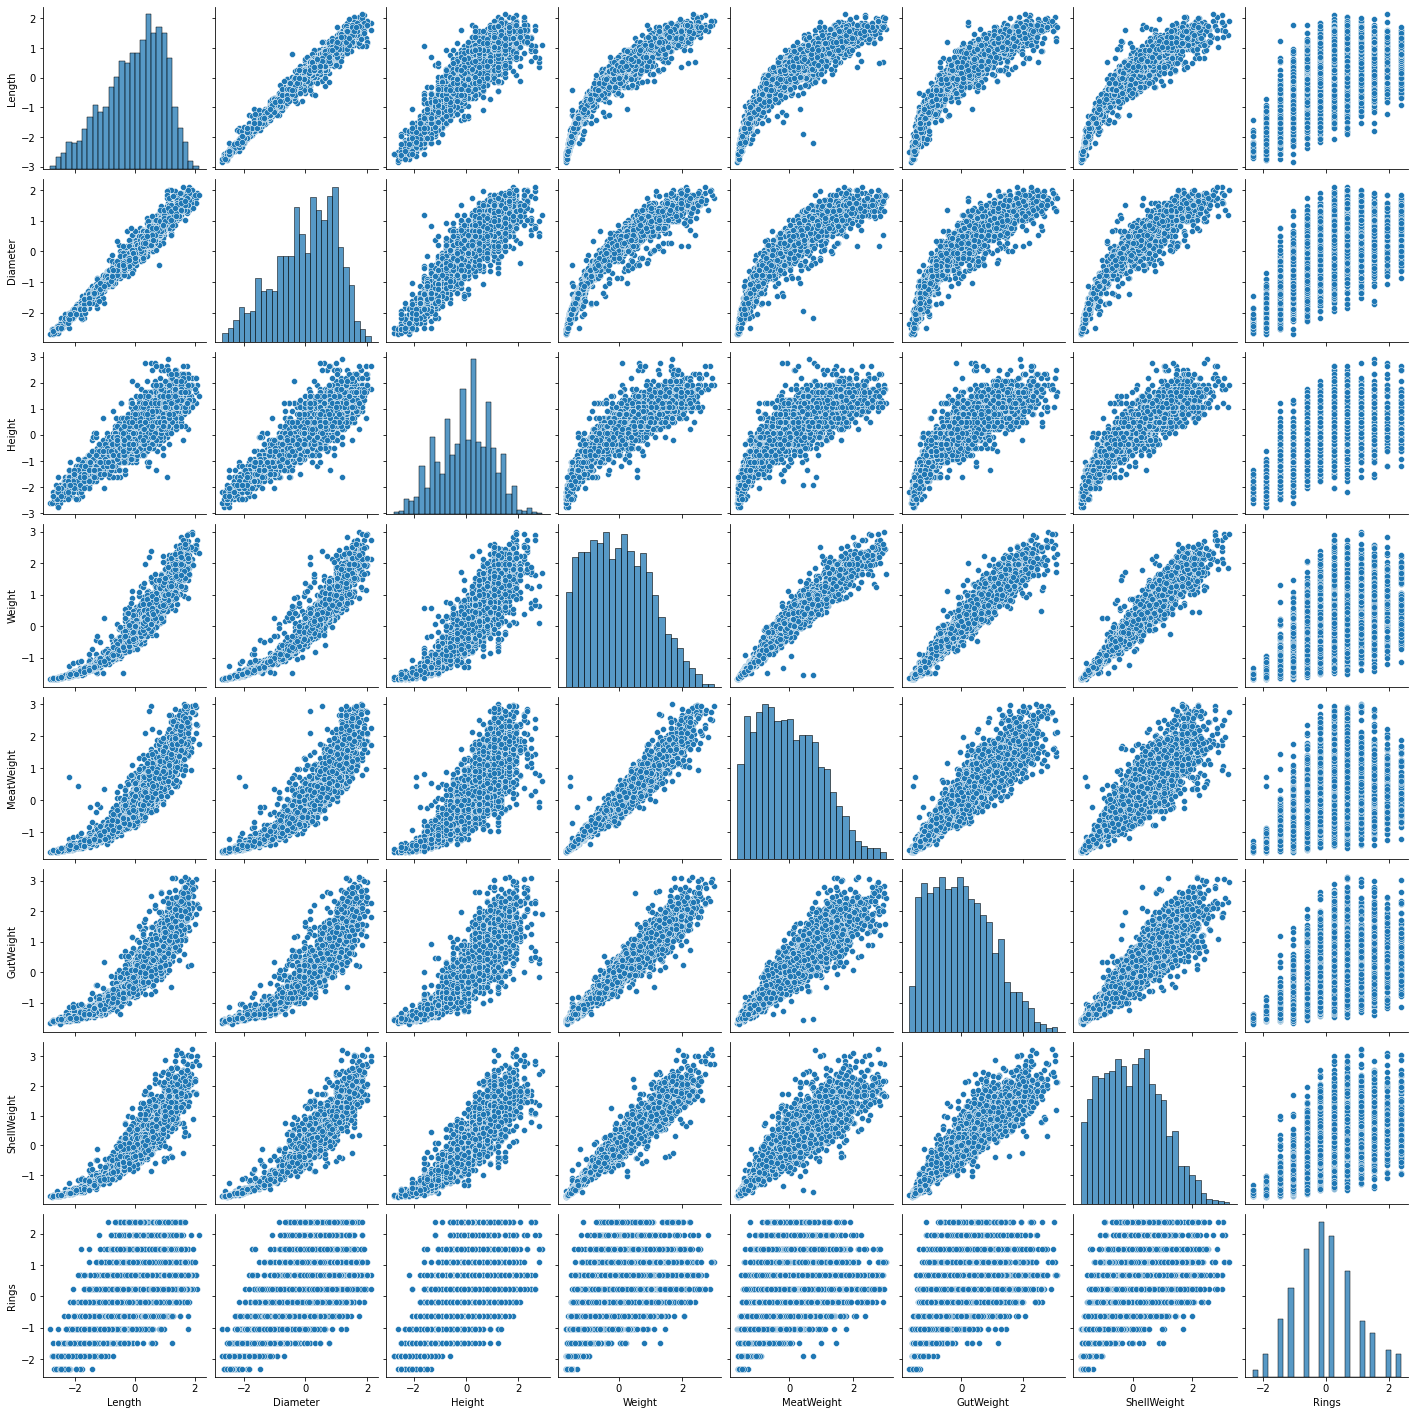

In [126]:
sns.pairplot(df_scaled)

## Step 3: Calculate the eigenvalues and eigenvectors

In [127]:
eig_vals, eig_vec = np.linalg.eig(cov_matrix)

print('Eigen values : ',eig_vals)
print()
print('Eigen vectors : ',eig_vec)

Eigen values :  [6.91679134e+00 6.47604608e-01 1.53803181e-01 1.27971867e-01
 6.38734529e-02 7.20464742e-02 1.33506514e-02 6.67483092e-03]

Eigen vectors :  [[ 3.69299847e-01  6.82295412e-02 -2.28764333e-01 -5.44685228e-01
  -1.41110460e-01  3.94772163e-02  6.98885453e-01  5.97885074e-03]
 [ 3.69785158e-01  3.79219046e-02 -2.62420722e-01 -5.26872695e-01
  -8.82614221e-02 -4.78225818e-02 -7.10801123e-01  6.78815312e-03]
 [ 3.56319199e-01 -4.40439743e-02 -7.11507480e-01  5.47315237e-01
   8.53609419e-02  2.40434838e-01  1.32861083e-02  5.28883464e-03]
 [ 3.73713049e-01  1.46432242e-01  2.81444341e-01  1.23551570e-01
   1.40963486e-01 -4.41556255e-02  3.29317519e-04  8.50058654e-01]
 [ 3.60003183e-01  2.74032415e-01  3.60661295e-01 -1.87892421e-02
   5.65598096e-01  4.35728840e-01 -2.06214836e-02 -3.93304291e-01]
 [ 3.64631171e-01  1.45844646e-01  3.39281655e-01  2.71900509e-01
  -7.68730071e-01  1.51321712e-01 -4.59814425e-02 -2.01923364e-01]
 [ 3.68932661e-01  5.23972624e-03  6.60929302

In [128]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vec[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(6.916791336860957,
  array([0.36929985, 0.36978516, 0.3563192 , 0.37371305, 0.36000318,
         0.36463117, 0.36893266, 0.24815772])),
 (0.6476046079343352,
  array([ 0.06822954,  0.0379219 , -0.04404397,  0.14643224,  0.27403241,
          0.14584465,  0.00523973, -0.93495054])),
 (0.15380318059765422,
  array([-0.22876433, -0.26242072, -0.71150748,  0.28144434,  0.36066129,
          0.33928165,  0.06609293,  0.2092643 ])),
 (0.12797186731882312,
  array([-0.54468523, -0.5268727 ,  0.54731524,  0.12355157, -0.01878924,
          0.27190051,  0.18906614, -0.02958511])),
 (0.06387345286811182,
  array([-0.14111046, -0.08826142,  0.08536094,  0.14096349,  0.5655981 ,
         -0.76873007,  0.17801317,  0.05103672])),
 (0.07204647418814882,
  array([ 0.03947722, -0.04782258,  0.24043484, -0.04415563,  0.43572884,
          0.15132171, -0.84078456,  0.1293034 ])),
 (0.013350651427711916,
  array([ 6.98885453e-01, -7.10801123e-01,  1.32861083e-02,  3.29317519e-04,
         -2.06214836e-

In [129]:
total = np.sum(eig_vals)
var_exp = [(i/total)*100  for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained :',var_exp)
print()
print('Cumulative Variance Explained :',cum_var_exp)

Variance Explained : [86.4370247729913, 8.092916615947454, 1.9220312835861304, 1.5992252660180881, 0.9003427414414256, 0.7982069949797097, 0.16683900554334508, 0.08341331949253863]

Cumulative Variance Explained : [ 86.43702477  94.52994139  96.45197267  98.05119794  98.95154068
  99.74974767  99.91658668 100.        ]


## Plotting a cumulative eigen value graph.

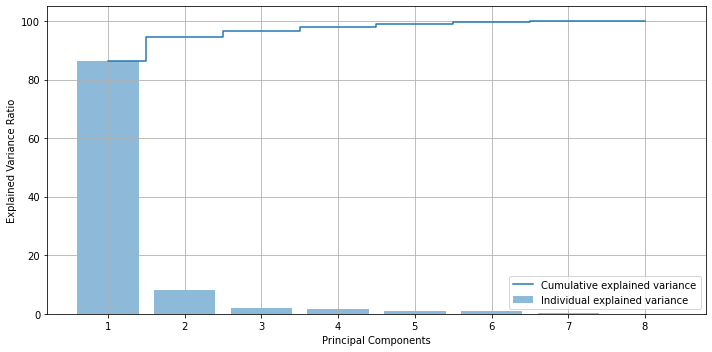

In [130]:
plt.figure(figsize=(10 , 5))

plt.bar(range(1,eig_vals.size+1),var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance' )
plt.step(range(1,eig_vals.size+1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.grid()
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

First 4 principal components explain 99% of the variance in the data. The first 4 PCA is shown below
The 4 PCA will have to be named because they represent composite of original dimensions

Eigen vectors/principal components with insignificant contribution to total eigen values can be removed from analysis without loosing much information.

In [131]:
data = [var_exp,cum_var_exp]
exp_df = pd.DataFrame(data).T
exp_df.rename(columns = {0:'Explained_variance', 1:'Cummulative variance'},inplace = True)
exp_df['Components'] = range(1,eig_vals.size+1)
exp_df

Explained_variance  Cummulative variance  Components
0            86.43702              86.43702           1
1             8.09292              94.52994           2
2             1.92203              96.45197           3
3             1.59923              98.05120           4
4             0.90034              98.95154           5
5             0.79821              99.74975           6
6             0.16684              99.91659           7
7             0.08341             100.00000           8

In [132]:
cols = exp_df.columns.tolist()[-1:] + exp_df.columns.tolist()[:-1]
exp_df[cols]

Components  Explained_variance  Cummulative variance
0           1            86.43702              86.43702
1           2             8.09292              94.52994
2           3             1.92203              96.45197
3           4             1.59923              98.05120
4           5             0.90034              98.95154
5           6             0.79821              99.74975
6           7             0.16684              99.91659
7           8             0.08341             100.00000

## Plotting Explained Variance ratio (Using Plotly and pca)

In [143]:

import plotly.express as px
from sklearn.decomposition import PCA

# df2 = df.copy
features = ['Length', 'Diameter', 'Height', 'Weight', 'MeatWeight','GutWeight', 'ShellWeight', 'Rings']
pca = PCA()
components = pca.fit_transform(df_aba[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df_aba["Gender"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [133]:
eigen_pairs.sort()
eigen_pairs.reverse()

eigvalues_sort = [eigen_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(eig_vals))]

In [139]:
P_reduce = np.array(eigvectors_sort[0:4]).transpose()

Proj_data_2D = np.dot(df_scaled,P_reduce)
P_reduce
# Proj_data_2D

array([[ 0.36929985,  0.06822954, -0.22876433, -0.54468523],
       [ 0.36978516,  0.0379219 , -0.26242072, -0.5268727 ],
       [ 0.3563192 , -0.04404397, -0.71150748,  0.54731524],
       [ 0.37371305,  0.14643224,  0.28144434,  0.12355157],
       [ 0.36000318,  0.27403241,  0.36066129, -0.01878924],
       [ 0.36463117,  0.14584465,  0.33928165,  0.27190051],
       [ 0.36893266,  0.00523973,  0.06609293,  0.18906614],
       [ 0.24815772, -0.93495054,  0.2092643 , -0.02958511]])

## Build a classification model 

### DT After Applying PCA

In [135]:
X = Proj_data_2D
y =df_aba['Gender']
X.shape, y.shape

((3781, 4), (4177,))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

ValueError: Found input variables with inconsistent numbers of samples: [3781, 4177]

In [ ]:
X = Proj_data_2D
y =df_aba['Gender']